In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    accuracy_score, precision_score, recall_score,f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#create binary classification dataset
x,y=make_classification(n_samples=1000,n_classes=2,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
#train logistic regression model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
#predict class labels
y_pred=model.predict(x_test)

In [16]:
#predict probabilites for class 1(needed for5 ROC Curve)
y_probs=model.predict_proba(x_test)[:, 1]

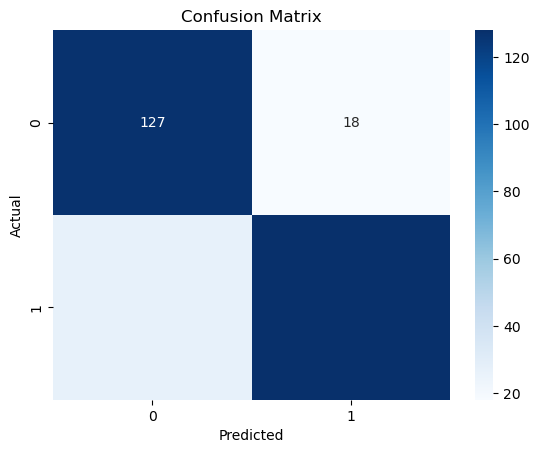

In [15]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
#logistic Regression Performance Metrics
print("Accuracy:",accuracy_score(y_test,y_test))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("ROC AUC Score:", roc_auc_score(y_test,y_probs))

Accuracy: 1.0
Precision: 0.8767123287671232
Recall: 0.8258064516129032
F1 Score: 0.8504983388704319
ROC AUC Score: 0.9141713014460511


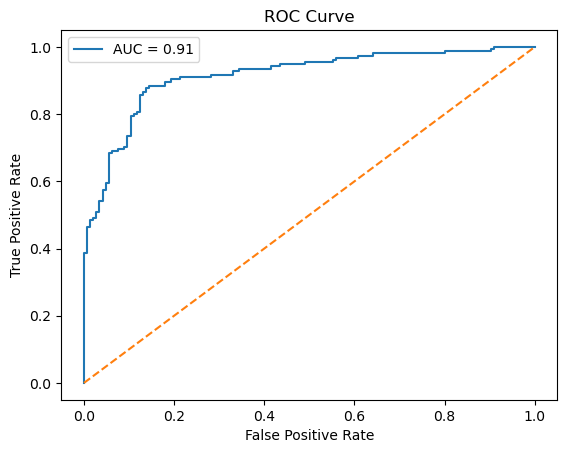

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Line representing random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()